In [139]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [140]:
#Helping Functions
def read_data(path):
    return pd.read_csv(path, index_col=0)

In [141]:
#Train dataset
dataframe=read_data('data.csv')

# print(dataframe)

x_train=dataframe[dataframe.columns.drop('diagnosis')]
y_train=dataframe['diagnosis']

print(dataframe.shape)
print(x_train.shape)
print(y_train.shape)

(569, 17)
(569, 16)
(569,)


In [142]:
#find any missing or null data points
dataframe.isnull().sum()
dataframe.isna().sum()

diagnosis                  0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
symmetry_mean              0
fractal_dimension_mean     0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [149]:
#Encoding categorical data values
labelencoder_Y = LabelEncoder()
y_train = labelencoder_Y.fit_transform(y_train)
# print(y_train)

In [144]:
#Trian Test Split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.25, random_state=0)

In [145]:
#Feature Scaling - fits within a specific scale, like 0–100 or 0–1
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [146]:
#Model Prediction
lg = LogisticRegression(random_state = 0)
lg.fit(x_train, y_train)

y_pred = lg.predict(x_test)
print(y_pred.shape)
print(y_test.shape)

(143,)
(143,)


In [147]:
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test,y_pred))
#R2 Score
print('R2 Score: %.2f' % r2_score(y_test,y_pred))

Mean squared error: 0.06
R2 Score: 0.76


Text(0.5, 1.0, 'First 100 actual and Predicted values')

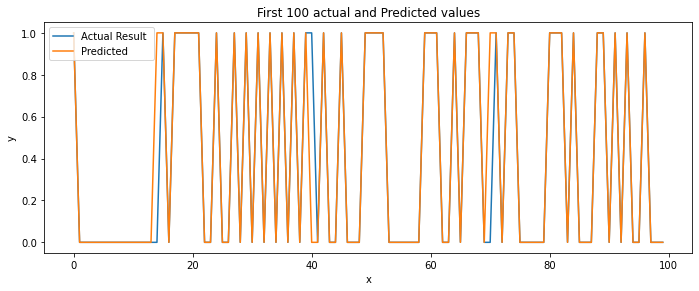

In [148]:
# Visualization
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.5, 0.8])
axes.plot(y_test[0:100], label="Actual Result ")
axes.plot(y_pred[0:100], label="Predicted")

axes.legend(loc=2); # upper left corner
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('First 100 actual and Predicted values')